# 데이터 불러오기
- http://data.seoul.go.kr/dataList/OA-101/A/1/datasetView.do
(서울시 역코드로 지하철역별 열차 시간표 정보 검색)

## 샘플 데이터 확인

In [1]:
import requests

url= "http://openapi.seoul.go.kr:8088/69576567536c736f3133357542784147/json/SearchSTNTimeTableByIDService/1/5/0244/1/1/"
req = requests.get(url)
print(req)

<Response [200]>


In [2]:
json_df = req.json()
# json_df

In [3]:
import pandas as pd

sub = json_df['SearchSTNTimeTableByIDService']['row']
subway_1 = pd.DataFrame(sub)
print(subway_1)

  LINE_NUM FR_CODE STATION_CD STATION_NM TRAIN_NO ARRIVETIME  LEFTTIME  \
0     02호선   211-1       0244         용답     1502   05:35:30  05:36:00   
1     02호선   211-1       0244         용답     1504   05:52:30  05:53:00   
2     02호선   211-1       0244         용답     1506   06:07:30  06:08:00   
3     02호선   211-1       0244         용답     1508   06:22:30  06:23:00   
4     02호선   211-1       0244         용답     1510   06:38:30  06:39:00   

  ORIGINSTATION DESTSTATION SUBWAYSNAME SUBWAYENAME WEEK_TAG INOUT_TAG  \
0          0246        0211         신설동          성수        1         1   
1          0246        0211         신설동          성수        1         1   
2          0246        0211         신설동          성수        1         1   
3          0246        0211         신설동          성수        1         1   
4          0246        0211         신설동          성수        1         1   

  FL_FLAG DESTSTATION2 EXPRESS_YN BRANCH_LINE  
0                               G              
1             

## 데이터 불러오기
### 역 코드 

In [4]:
code = pd.read_csv("호선별_역코드.csv")
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전철역코드   411 non-null    int64 
 1   전철역명    411 non-null    object
 2   호선      411 non-null    object
 3   외부코드    411 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.0+ KB


- 코드가 무조건 숫자 4개로 구성되어야 데이터를 불러올 때 오류가 안난다.

In [5]:
code['전철역코드'] = code['전철역코드'].astype(str).str.zfill(4)

In [6]:
code.loc[code['전철역명'] == '용답']

,전철역코드,전철역명,호선,외부코드
0,0244,용답,02호선,211-1


In [7]:
code

,전철역코드,전철역명,호선,외부코드
0,0244,용답,02호선,211-1
1,0245,신답,02호선,211-2
2,0250,용두,02호선,211-3
3,0336,학여울,03호선,346
4,0428,삼각지,04호선,428
...,...,...,...,...
406,0158,청량리,01호선,124
407,0159,동묘앞,01호선,127
408,0200,까치산,02호선,234-4
409,0201,시청,02호선,201


- 호선별 정리

In [8]:
code.sort_values(by='호선', inplace=True)
code.tail()

,전철역코드,전철역명,호선,외부코드
327,2814,몽촌토성,08호선,813
68,2815,잠실,08호선,814
260,2819,문정,08호선,818
396,2827,모란,08호선,827
312,2820,장지,08호선,819


### 열차시간표
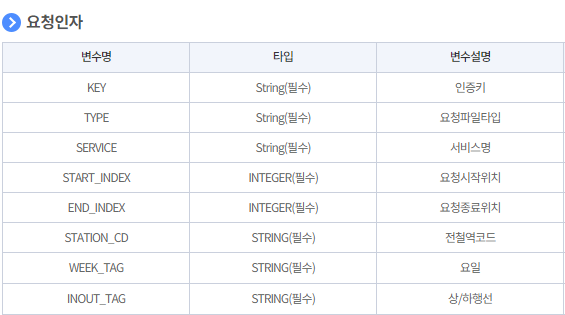
- 요일: 1-평일, 2-토요일, 3-휴일, 일요일
- 상/하행선: 1-상행, 내선 / 2-하행, 외선

In [9]:
st_codes = code['전철역코드'].tolist()
# st_codes

- url에서 {st_code} 하나 지정하고 하면 키오류 안남

In [19]:
import requests
import json
import pandas as pd

SERVICE_KEY = '69576567536c736f3133357542784147'
st_codes = code['전철역코드'].tolist()

data = pd.DataFrame()
for i in range(1, 4):
    for k in range(1, 3):
        for st_code in st_codes:
            url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/Json/SearchSTNTimeTableByIDService/1/1000/{st_code}/{i}/{k}/'
            req = requests.get(url)
            content = req.json()   
            con = content['SearchSTNTimeTableByIDService']['row']
            result = pd.DataFrame(con)
            data = pd.concat([data, result])
print(data)

KeyError: 'SearchSTNTimeTableByIDService'

In [ ]:
import requests
import json
import pandas as pd

SERVICE_KEY = '69576567536c736f3133357542784147'
st_codes = code['전철역코드'].tolist()

data = pd.DataFrame()
for i in range(1, 4):
    for k in range(1, 3):
        for st_code in st_codes:
            url = f'http://openapi.seoul.go.kr:8088/{SERVICE_KEY}/Json/SearchSTNTimeTableByIDService/1/1000/{st_code}/{i}/{k}/'
            req = requests.get(url)
            content = req.json()   
            con = content['SearchSTNTimeTableByIDService']['row']
            result = pd.DataFrame(con)
            data = pd.concat([data, result])
            print(data.tail(10))

In [25]:
data.LINE_NUM.value_counts()

LINE_NUM
01호선    14580
02호선    11697
05호선     9402
04호선     8856
03호선     7717
Name: count, dtype: int64